# Topic Modeling with the Hillary Clinton Emails Dataset

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading in and Preprocessing the Data

In [2]:
emails = pd.read_csv('./hillary-clinton-emails/Emails.csv')
emails.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [3]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7945 entries, 0 to 7944
Data columns (total 22 columns):
Id                              7945 non-null int64
DocNumber                       7945 non-null object
MetadataSubject                 7649 non-null object
MetadataTo                      7690 non-null object
MetadataFrom                    7788 non-null object
SenderPersonId                  7788 non-null float64
MetadataDateSent                7813 non-null object
MetadataDateReleased            7945 non-null object
MetadataPdfLink                 7945 non-null object
MetadataCaseNumber              7945 non-null object
MetadataDocumentClass           7945 non-null object
ExtractedSubject                6260 non-null object
ExtractedTo                     3288 non-null object
ExtractedFrom                   6692 non-null object
ExtractedCc                     2640 non-null object
ExtractedDateSent               6628 non-null object
ExtractedCaseNumber             7944 non-null

### Looking at the Raw Text of the Emails
We can take a look at the raw, unprocessed text of the emails and see that they have unwanted characters such as numbers and newline characters.

In [4]:
emails['RawText']

0       UNCLASSIFIED\nU.S. Department of State\nCase N...
1       UNCLASSIFIED\nU.S. Department of State\nCase N...
2       UNCLASSIFIED\nU.S. Department of State\nCase N...
3       UNCLASSIFIED\nU.S. Department of State\nCase N...
4       B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
5       B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
6       UNCLASSIFIED\nU.S. Department of State\nCase N...
7       B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
8       UNCLASSIFIED\nU.S. Department of State\nCase N...
9       UNCLASSIFIED\nU.S. Department of State\nCase N...
10      UNCLASSIFIED\nU.S. Department of State\nCase N...
11      UNCLASSIFIED\nU.S. Department of State\nCase N...
12      UNCLASSIFIED\nU.S. Department of State\nCase N...
13      UNCLASSIFIED\nU.S. Department of State\nCase N...
14      UNCLASSIFIED\nU.S. Department of State\nCase N...
15      UNCLASSIFIED\nU.S. Department of State\nCase N...
16      -ottgat,t\n4 44 4, 0\n.\n1.3.141.4443\nUNCLASS...
17      c. 371

### Preprocessing the Raw Text Data
We want to remove any unwanted characters from the text of the emails and we can do so defining a function to preprocess the text using regular expressions. Regular expressions basically allow us to define different sets of characters that we want to ignore or replace with different characters. We can use regular expressions to remove HTML markup, punctuation, numbers, and uppercase characters from the raw text.

In [5]:
import re # regex library
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text) # Effectively removes HTML markup tags
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text) # Finds emoticons and punctuation
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '') # removes uppercase and emoticons
    text = re.sub("[^A-Za-z]", " ", text) # removes non-letter characters (numbers)
    return text

Now that we have defined a function to preprocess the text, we can create a new column called **Processed Text** that contains the preprocessed version of the **RawText** column.

In [6]:
emails['Processed Text'] = emails['RawText'].apply(preprocessor)

## Running Latent Dirichlet Allocation with a Count Vectorizer
**Latent Dirichlet Allocation** is an unsupervised algorithm for topic modeling that can be used to generate topics from any **corpus**. Here are some basic terms and concepts behind LDA:
- A **document** is defined as a sequence of words. In this case, a document is just a single email.
- A **corpus** is a collection of documents, which in this case is a collection of emails.
- A **topic** is characterized by a particular probability distribution over different words. For example, in the topic of **soccer** certain words such as **free kick** and **offside** are more likely to appear than others.
- A document contains a **mixture of different topics** with some topics being more relevant or prominent than others.
- LDA involves using the **Dirichlet distribution** to model the distribution of words among different topics.

The LDA algorithm allows us to not only extract the major topics from a corpus, but also allows us to create a model that can be used to infer which of these topics are most prevalent in any given document, even if it was not present in the original corpus.

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

num_topics = 5
num_features=5000

print('Running CountVectorizer...')
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=num_features, stop_words='english')
tf = tf_vectorizer.fit_transform(emails['Processed Text'])
tf_feature_names = tf_vectorizer.get_feature_names()

print('Running Latent Dirichlet Allocation...')
lda = LatentDirichletAllocation(n_topics=num_topics,
                                max_iter=5, 
                                learning_method='online', 
                                learning_offset=50.,
                                random_state=0).fit(tf)

Running CountVectorizer...
Running Latent Dirichlet Allocation...


//anaconda/lib/python3.5/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


### Defining a Function to Display the Topics Found by LDA

In [8]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

num_top_words=10
display_topics(lda, tf_feature_names, num_top_words)

Topic 0:
haiti public president government new senate said work health support
Topic 1:
benghazi sensitive information agreement dept house subject produced select waiver
Topic 2:
party sid said deal election sbwhoeop brown minister gordon uk
Topic 3:
subject pm message original huma abedin cheryl cc mills sullivan
Topic 4:
said obama president american new clinton people israel world security


### Viewing the Distribution of Possible Topics in a Particular Email

In [9]:
emails['Processed Text'][0]

'unclassified u s department of state case no f            doc no c         date            state dept produced to house select benghazi comm subject to agreement on sensitive information redactions no foia waiver release in full from sullivan jacob j sent wednesday september               am to subject fw wow from brose christian armed services mailto christian brose armed servic essenate govi sent wednesday september               am to sullivan jacob j subject wow what a wonderful strong and moving statement by your boss please tell her how much sen mccain appreciated it me too unclassified u s department of state case no f            doc no c         date            state dept produced to house select benghazi comm subject to agreement on sensitive information redactions no foia waiver state  cb        '

In [10]:
lda.transform(tf_vectorizer.transform([emails['Processed Text'][0]]))

array([[0.00369086, 0.68961802, 0.0036613 , 0.29930136, 0.00372845]])

### Combining the Count Vectorizer with LDA using a Pipeline

In [11]:
from sklearn.pipeline import Pipeline

num_topics=5
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=num_features, stop_words='english')
lda = LatentDirichletAllocation(n_topics=num_topics,
                                max_iter=5, 
                                learning_method='online', 
                                learning_offset=50.,
                                random_state=0)

lda_pipeline = Pipeline([('vectorizer', tf_vectorizer), ('lda', lda)])
lda_pipeline.fit(emails['Processed Text'])

//anaconda/lib/python3.5/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=5000, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
 ...           random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0))])

In [12]:
lda_pipeline.steps

[('vectorizer',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
          dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
          lowercase=True, max_df=0.95, max_features=5000, min_df=2,
          ngram_range=(1, 1), preprocessor=None, stop_words='english',
          strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
          tokenizer=None, vocabulary=None)),
 ('lda', LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
               evaluate_every=-1, learning_decay=0.7,
               learning_method='online', learning_offset=50.0,
               max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
               n_components=10, n_jobs=1, n_topics=5, perp_tol=0.1,
               random_state=0, topic_word_prior=None,
               total_samples=1000000.0, verbose=0))]

### Displaying Topics From the Pipeline

In [13]:
def display_topics_pipeline(pipeline_lda, no_top_words):
    vectorizer = pipeline_lda.steps[0][1]
    lda = pipeline_lda.steps[1][1]
    tf_feature_names = vectorizer.get_feature_names()
    display_topics(lda, tf_feature_names, no_top_words)

In [14]:
display_topics_pipeline(lda_pipeline, no_top_words=8)

Topic 0:
haiti public president government new senate said work
Topic 1:
benghazi sensitive information agreement dept house subject produced
Topic 2:
party sid said deal election sbwhoeop brown minister
Topic 3:
subject pm message original huma abedin cheryl cc
Topic 4:
said obama president american new clinton people israel


## Visualizing the Results

### Creating a Word Cloud For All of the Emails

In [15]:
from wordcloud import WordCloud, STOPWORDS
from pyprind import ProgBar

STOPWORDS.add('subject')
STOPWORDS.add('date')

all_text = ""
num_iter = len(emails)
pbar = ProgBar(num_iter, monitor=True, title='')

for i in range(num_iter):
    
    all_text = all_text + emails.iloc[i]['Processed Text']

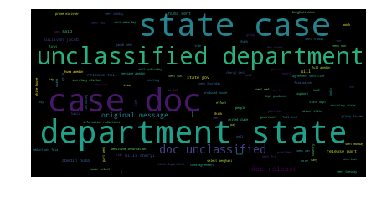

In [23]:
wordcloud = WordCloud(background_color='black', stopwords=STOPWORDS, 
                      max_words=100, relative_scaling=1.0).generate(all_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('./word_cloud_images/full_corpus.png')
plt.show()

## Generating Word Clouds for Each Topic

In [24]:
from collections import defaultdict
import math

def find_power_of_ten(value):
    
    return math.floor(math.log(value)/math.log(10))

def get_frequency_dict(pipeline, no_top_words, topic_no):
    
    vectorizer = pipeline.steps[0][1]
    lda = pipeline.steps[1][1]
    feature_names = vectorizer.get_feature_names()
    
    topic = lda.components_[topic_no]
    top_args = topic.argsort()[:-no_top_words - 1:-1]
    
    top_words = [feature_names[i] for i in top_args]
    frequencies = [topic[i] for i in top_args]
    
    return dict(zip(top_words, frequencies))

def create_corpus(frequency_dict):
    
    corpus = ""
    min_weight = min(frequency_dict.values())
    min_weight_power = find_power_of_ten(min_weight)
    
    if min_weight_power < 0:
        multiplier = 10 ** -min_weight_power
    else:
        multiplier = 1
    
    for word, weight in frequency_dict.items():
        
        frequency = int(round(multiplier * weight))
        corpus = corpus + (word + " ") * frequency
    
    return corpus

def create_word_cloud(corpus, output_file, max_words=200):
    
    wordcloud = WordCloud(background_color='black', stopwords=STOPWORDS, 
                      max_words=max_words, relative_scaling=1.0).generate(corpus)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig(output_file)
    plt.show()

def create_word_cloud_for_topics(pipeline, topic_no, output_file, max_words=200):
    
    frequency_dict = get_frequency_dict(pipeline, max_words, topic_no)
    corpus = create_corpus(frequency_dict)
    create_word_cloud(corpus, output_file, max_words=max_words)

### Topic 0: Haiti Earthquake and the Clinton Foundation

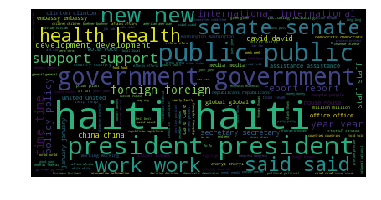

In [25]:
create_word_cloud_for_topics(lda_pipeline, topic_no=0, output_file='./word_cloud_images/topic_0.png')

### Topic 1: Benghazi Controversy




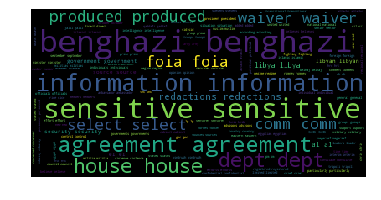

In [26]:
create_word_cloud_for_topics(lda_pipeline, topic_no=1, output_file='./word_cloud_images/topic_1.png')

### Topic 2

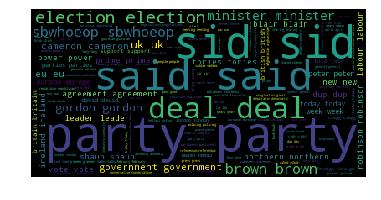

In [27]:
create_word_cloud_for_topics(lda_pipeline, topic_no=2, output_file='./word_cloud_images/topic_2.png')

### Topic 3

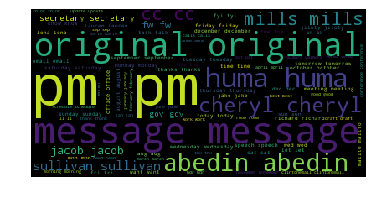

In [28]:
create_word_cloud_for_topics(lda_pipeline, topic_no=3, output_file='./word_cloud_images/topic_3.png')

### Topic 4: President Obama and 2016 Election

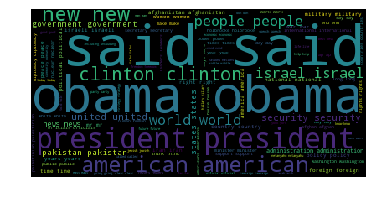

In [29]:
create_word_cloud_for_topics(lda_pipeline, topic_no=4, output_file='./word_cloud_images/topic_4.png')